# Image classifier model of two classes

In [1]:
import torch
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Access to CUDA
device    = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
# Functions to show an image
def imshow(img):
    img = img*0.5 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [4]:
def transformLabels(lbl):
    animal = [2, 3, 4, 5, 6, 7]
    return torch.Tensor([lbl in animal])

In [5]:
transform = transforms.Compose(
    [
        #transforms.RandAugment(),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

batch_size = 32

# Form the training dataset
trainset   = torchvision.datasets.CIFAR10(root='../data/CIFAR10', train=True, download=True, transform=transform, target_transform = transformLabels)
trainloader= torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

# Form the testing dataset
testset    = torchvision.datasets.CIFAR10(root='../data/CIFAR10', train=False, download=True, transform=transform, target_transform = transformLabels)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

classes = ("animaln't", 'animal')

Files already downloaded and verified
Files already downloaded and verified


In [6]:
# Take the first batch and show the images
dataiter       = iter(trainloader)
images, labels = next(dataiter)
print(images.shape)
print(labels.shape)

torch.Size([32, 3, 32, 32])
torch.Size([32, 1])


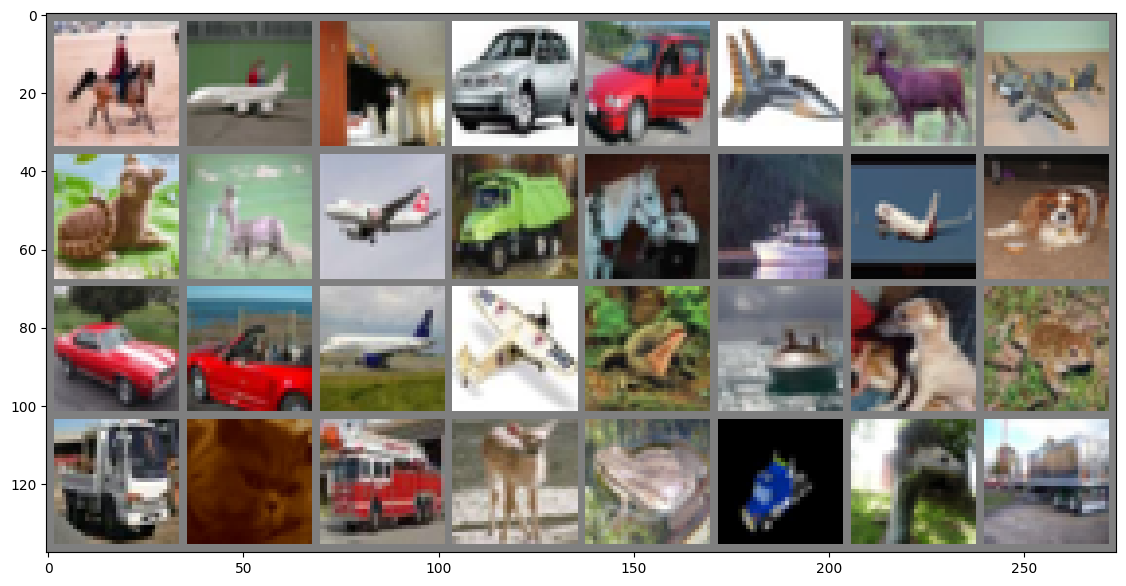

animal animaln't animal animaln't animaln't animaln't animal animaln't animal animal animaln't animaln't animal animaln't animaln't animal animaln't animaln't animaln't animaln't animal animaln't animal animal animaln't animal animaln't animal animal animaln't animal animaln't


In [7]:
# Show images
matplotlib.rcParams['figure.figsize'] = [14, 7]
imshow(torchvision.utils.make_grid(images,nrow = 8))
# Print their corresponding classes
print(' '.join('{}'.format(classes[int(labels[j])]) for j in range(batch_size)))

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class animalClassifier(nn.Module):


    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            #nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Softmax(dim = 1)
        )
        """
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.fc4 = nn.Linear(10, 1)
        self.fc5 = nn.Softmax()
        """

    def forward(self, x):
        return self.network(x)
        """
        x = self.pool(F.relu(self.conv1(x)))  # produce a batch of  6 x 14 x 14 features
        x = self.pool(F.relu(self.conv2(x)))  # produce a batch of 16 x 5 x  5 features
        x = torch.flatten(x, 1)               # flatten to produce a batch of vectors
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x
        """

classifier = animalClassifier()
classifier = classifier.to(device)

In [9]:
import torch.optim as optim

lossFunction = nn.BCELoss() # With or w/o ()?
#lossFunction = nn.functional.cross_entropy
optimizer    = optim.Adam(classifier.parameters(), lr=2e-4)

In [10]:
losses = []
# Each pass on this cycle will see all the batches from the training dataset
for epoch in range(100):
    running_loss = 0.0
    for i, batch in enumerate(trainloader, 0):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = classifier(inputs)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item()
        if i % 1000 ==  999:    # print every 1000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1000:.3f}')
            losses.append([epoch,running_loss / 1000.0])
            running_loss = 0.0

[1,  1000] loss: 40.141
[2,  1000] loss: 39.987
[3,  1000] loss: 39.812
[4,  1000] loss: 40.000
[5,  1000] loss: 39.928
[6,  1000] loss: 40.119
[7,  1000] loss: 39.834
[8,  1000] loss: 39.997
[9,  1000] loss: 40.212
[10,  1000] loss: 39.747
[11,  1000] loss: 40.175
[12,  1000] loss: 40.022
[13,  1000] loss: 39.825
[14,  1000] loss: 40.241
[15,  1000] loss: 40.044
[16,  1000] loss: 40.303
[17,  1000] loss: 40.091
[18,  1000] loss: 40.009
[19,  1000] loss: 40.013
[20,  1000] loss: 39.966
[21,  1000] loss: 40.206
[22,  1000] loss: 39.938
[23,  1000] loss: 40.069
[24,  1000] loss: 39.722
[25,  1000] loss: 40.016
[26,  1000] loss: 39.919
[27,  1000] loss: 40.044
[28,  1000] loss: 40.106
[29,  1000] loss: 40.244
[30,  1000] loss: 39.850
[31,  1000] loss: 39.822
[32,  1000] loss: 40.009
[33,  1000] loss: 40.147
[34,  1000] loss: 39.834
[35,  1000] loss: 39.812
[36,  1000] loss: 39.741
[37,  1000] loss: 40.397
[38,  1000] loss: 39.881
[39,  1000] loss: 39.709
[40,  1000] loss: 39.878
[41,  100

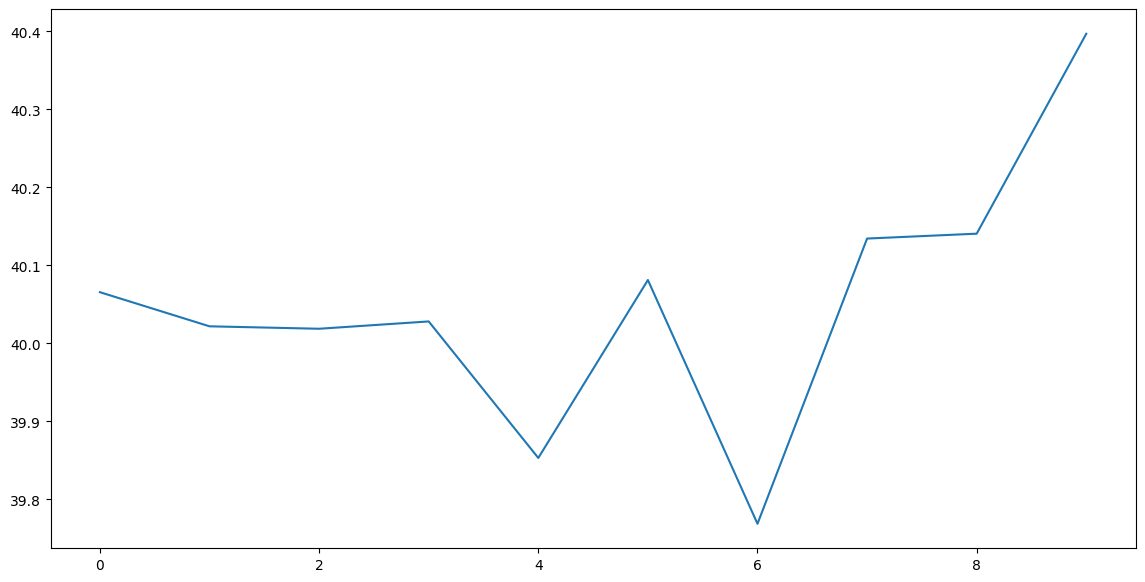

In [ ]:
losses = np.array(losses)
plt.plot(losses[:,0], losses[:,1])

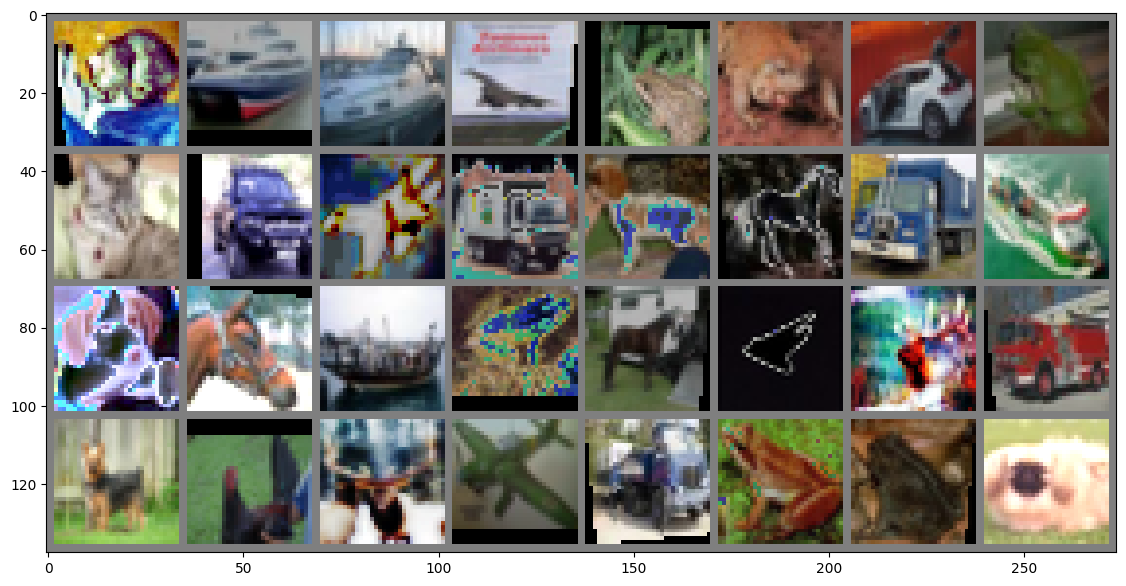

GroundTruth:  animal animaln't animaln't animaln't animal animal animaln't animal animal animaln't animaln't animaln't animal animal animaln't animaln't animal animal animaln't animal animal animaln't animal animaln't animal animal animal animaln't animaln't animal animal animal
Predicted:    animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't animaln't


In [ ]:
batch          = iter(testloader)
images, labels = next(batch)
classifier = classifier.to('cpu')
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[int(labels[j])]:5s}' for j in range(batch_size)))
_, predicted = torch.max(classifier(images), 1)
print('Predicted:   ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for batch in testloader:
        images, labels = batch
        # the class with the highest energy is what we choose as prediction
        predicted = torch.where(classifier(images).data >= 0.5, 1, 0)
        total   += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total}%')

Accuracy of the network on the test images: 60%


# CPU/GPU

You can check what devices your system has:

In [ ]:
# Access to CUDA
device    = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


To use CUDA:

* Use the **to** method to move the data/model to the GPU
* Use the same method to get it back to CPU.